# 15-08-2022 Deep Learning - multilayer perceptions - MLPs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
import graphviz

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Uzytkownik/anaconda3/Library/bin/graphviz'

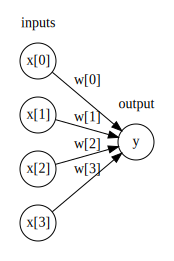

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())
#visualization of logistic regression

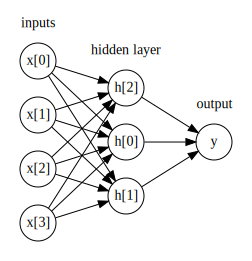

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())
#illustration of a multilayer perception with a single hidden layer

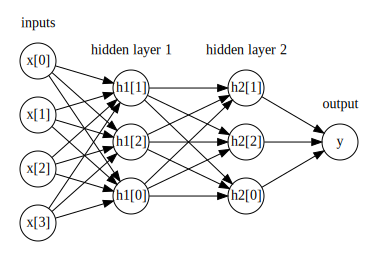

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

### Large neural networks --> deep learning

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

Text(0, 0.5, 'Feature 1')

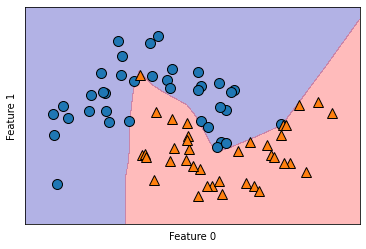

In [7]:
mlp = MLPClassifier(solver = "lbfgs", random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#Decision boundary learned by a neural network with 100 hidden units


c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

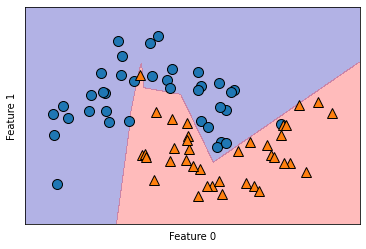

In [8]:
#we can reduce the value of hidden layers
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

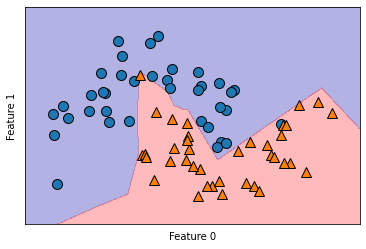

In [9]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

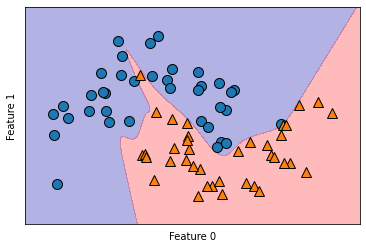

In [10]:
# using two hidden layers, with 10 units each, with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10], activation = 'tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [11]:
#Let us find how the decision boundary loooks like for:
#different value of number of hidden nodes and alpha

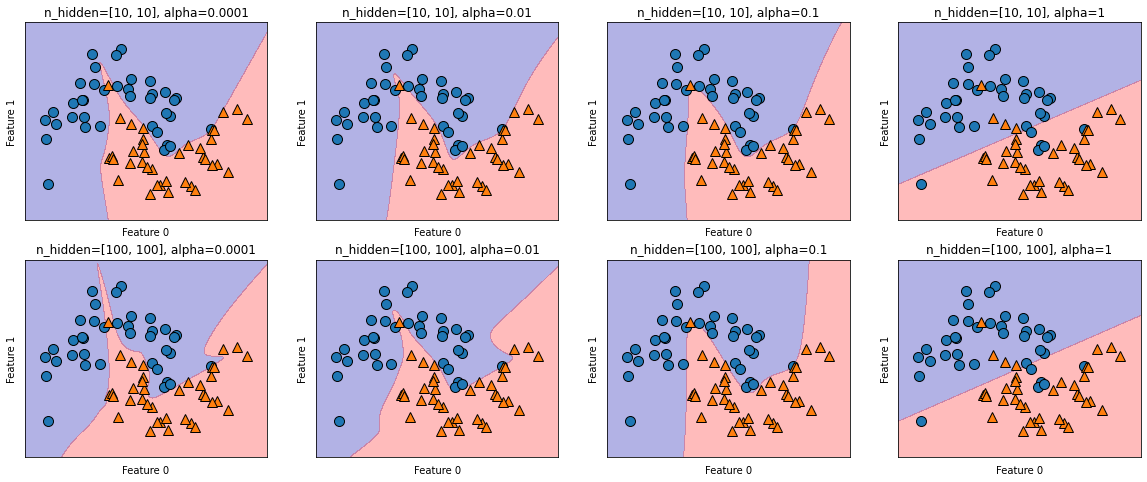

In [12]:
fig, axes = plt.subplots(2,4, figsize = (20,8))

for ax, n_hidden_nodes in zip(axes, [10,100]): #row
    for axx, alpha in zip(ax,[0.0001,0.01, 0.1, 1]): #column
        
        mlp = MLPClassifier(solver='lbfgs', random_state=0, alpha= alpha, max_iter=10000,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], activation = 'tanh')
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax = axx)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax= axx)
        axx.set_title(f"n_hidden=[{n_hidden_nodes}, {n_hidden_nodes}], alpha={alpha}")
        axx.set_xlabel("Feature 0")
        axx.set_ylabel("Feature 1")
        

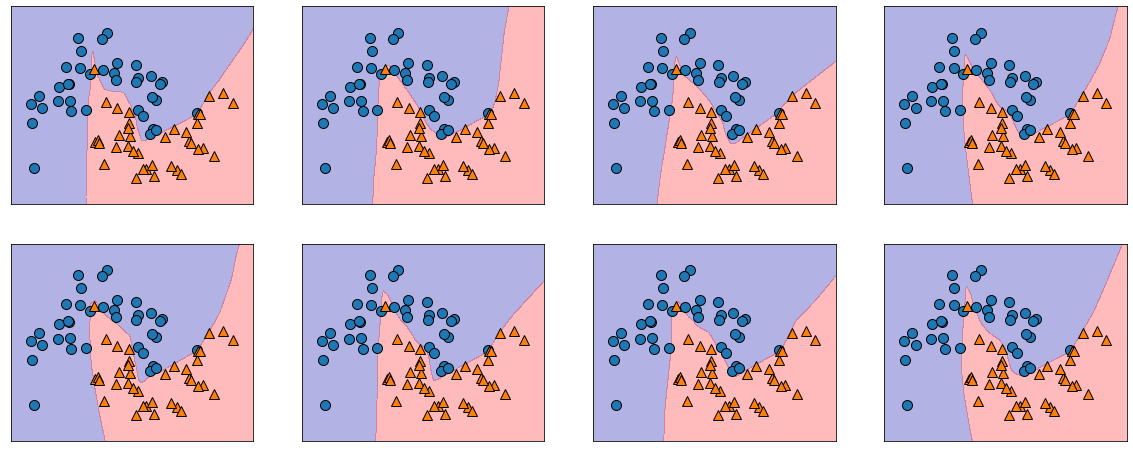

In [13]:
#Weights are set randomly at the beginning
fig, axes = plt.subplots(2,4, figsize = (20,8))

for i, ax in zip(range(8), axes.ravel()): #alternative: enumerate(axes.ravel()) 
    #ravel returns 1D array 
    
    mlp = MLPClassifier(solver='lbfgs', random_state = i, max_iter=10000,
                hidden_layer_sizes=[100, 100], )
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax= ax)
    #same method but different seeds -> results in different estimators

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 42)
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print(f"Training score {mlp.score(X_train,y_train)}")
print(f"Test score: {mlp.score(X_test, y_test)}")

Training score 0.903755868544601
Test score: 0.9300699300699301


In [15]:
#the results are not excellent, and it would be good to rescale the data

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)


c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [16]:
print(f"Training score {mlp.score(X_train_scaled,y_train)}")
print(f"Test score: {mlp.score(X_test_scaled, y_test)}")

Training score 0.9929577464788732
Test score: 0.986013986013986


In [17]:
mlp = MLPClassifier(random_state=0, alpha = 1, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print(f"Training score {mlp.score(X_train_scaled,y_train)}")
print(f"Test score: {mlp.score(X_test_scaled, y_test)}")

Training score 0.9859154929577465
Test score: 0.993006993006993


(30, 100)

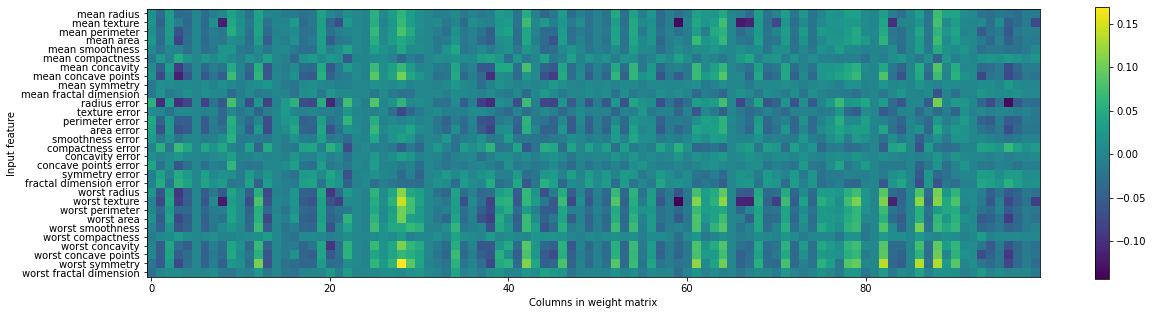

In [18]:
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap ='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar() 
#heat map of the first layer of weights ina neural network
mlp.coefs_[0].shape

# Uncertainty

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]


X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
 train_test_split(X, y_named, y, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)


GradientBoostingClassifier(random_state=0)

In [21]:
gbrt.predict_proba(X_test[:6])
#the probability of belonging to each class
#they sum to 1

array([[0.01573626, 0.98426374],
       [0.84575653, 0.15424347],
       [0.98112869, 0.01887131],
       [0.97407033, 0.02592967],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [27]:
gbrt.decision_function(X_test)[:6,:] 
#it also works for multiclass classification


array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108]])

In [28]:
gbrt.predict_proba(X_test)[:6,:]

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108]])